In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from textwrap import wrap

# 1) Analyse exploratoire

## 1.1 Fichier population

In [174]:
#Chargement du fichier population

population = pd.read_csv('population.csv')

#Infos sur le fichier

population.head()

population.info()

population.describe(include = 'all')

#Taille du datafram population

print("Le dataframe population contient {} lignes".format(population.shape[0]))
print("Le dataframe population contient {} colonnes".format(population.shape[1]))

#Renommage des colonnes du dataframe population

population.rename(columns = {'Valeur' : 'Population', 
                             'Année' : 'Annee'},
                  inplace = True)

# Harmonisation des unités, la taille de la population était exprimée en milliers.

population['Population'] = population['Population']*1000

# Variable population transformée en integer

population['Population'] = population['Population'].astype(int)

population.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB
Le dataframe population contient 1416 lignes
Le dataframe population contient 3 colonnes


,Zone,Annee,Population
0,Afghanistan,2013,32269589
1,Afghanistan,2014,33370794
2,Afghanistan,2015,34413603
3,Afghanistan,2016,35383032
4,Afghanistan,2017,36296113


## 1.2 Fichier dispo_alimentaire

In [175]:
#Chargement du fichier dispo_alimentaire

dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')

#Infos sur le fichier

dispo_alimentaire.head()

dispo_alimentaire.info()

dispo_alimentaire.describe(include = 'all')

#Renommage des colonnes du dataframe population

dispo_alimentaire.rename(columns = {'Disponibilité alimentaire (Kcal/personne/jour)' : 
                                    'Disponibilite alimentaire (cal/personne/jour)', 
                                    'Disponibilité alimentaire en quantité (kg/personne/an)' : 
                                    'Disponibilite alimentaire en quantite (kg/personne/an)', 
                                    'Disponibilité de matière grasse en quantité (g/personne/jour)':
                                    'Disponibilite de matiere grasse en quantite (g/personne/jour)',
                                    'Disponibilité de protéines en quantité (g/personne/jour)' :
                                    'Disponibilite de proteines en quantite (g/personne/jour)',
                                    'Disponibilité intérieure':'Disponibilite interieure',
                                    'Exportations - Quantité':'Exportations',
                                    'Importations - Quantité': 'Importations'},
                        inplace=True)

#Taille du dataframe dispo alimentaire

print("Le dataframe disponibilité alimentaire contient {} lignes".format(dispo_alimentaire.shape[0]))
print("Le dataframe disponibilité alimentaire contient {} colonnes".format(dispo_alimentaire.shape[1]))

#Remplacement des valeurs Nan par 0

dispo_alimentaire = dispo_alimentaire.fillna(0)

# Harmonisation des unités, les disponibilités alimentaires étaient exprimées en milliers de tonnes.

dispo_alimentaire.iloc[:, [3]] = dispo_alimentaire.iloc[:, [3]]*1000000
dispo_alimentaire.iloc[:, [4]] = dispo_alimentaire.iloc[:, [4]]*1000000 
dispo_alimentaire.iloc[:, [9]] = dispo_alimentaire.iloc[:, [9]]*1000000
dispo_alimentaire.iloc[:, [10]] = dispo_alimentaire.iloc[:, [10]]*1000000
dispo_alimentaire.iloc[:, [11]] = dispo_alimentaire.iloc[:, [11]]*1000000
dispo_alimentaire.iloc[:, [12]] = dispo_alimentaire.iloc[:, [12]]*1000000
dispo_alimentaire.iloc[:, [13]] = dispo_alimentaire.iloc[:, [13]]*1000000
dispo_alimentaire.iloc[:, [14]] = dispo_alimentaire.iloc[:, [14]]*1000000
dispo_alimentaire.iloc[:, [15]] = dispo_alimentaire.iloc[:, [15]]*1000000
dispo_alimentaire.iloc[:, [16]] = dispo_alimentaire.iloc[:, [16]]*1000000
dispo_alimentaire.iloc[:, [17]] = dispo_alimentaire.iloc[:, [17]]*1000000
dispo_alimentaire.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilite alimentaire (cal/personne/jour),Disponibilite alimentaire en quantite (kg/personne/an),Disponibilite de matiere grasse en quantite (g/personne/jour),Disponibilite de proteines en quantite (g/personne/jour),Disponibilite interieure,Exportations,Importations,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


## 1.3 Fichier aide_alimentaire

In [176]:
#Chargement du fichier aide alimentaire

aide_alimentaire = pd.read_csv('aide_alimentaire.csv')

#infos sur le fichier

aide_alimentaire.head()

aide_alimentaire.info()

aide_alimentaire.describe(include = 'all')

#Taille du dataframe aide alimentaire

print("Le dataframe aide alimentaire contient {} lignes".format(aide_alimentaire.shape[0]))
print("Le dataframe aide alimentaire contient {} colonnes".format(aide_alimentaire.shape[1]))

#Renommage des colones du dataframe aide alimentaire
renmae_dict = {}
aide_alimentaire.rename(columns = {
    'Pays bénéficiaire' : 'Zone',
    'Valeur' : 'Aide_alimentaire(kg)',
    'Année': 'Annee'}, inplace = True)

aide_alimentaire.iloc[:, [3]] = aide_alimentaire.iloc[:, [3]]*1000

aide_alimentaire.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB
Le dataframe aide alimentaire contient 1475 lignes
Le dataframe aide alimentaire contient 4 colonnes


,Zone,Annee,Produit,Aide_alimentaire(kg)
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


## 1.4 Fichier sous_nutrition

In [177]:
#Chargement du fichier sous nutrition

sous_nutrition = pd.read_csv('sous_nutrition.csv')

#infos sur le fichier

sous_nutrition.head()

sous_nutrition.info()

sous_nutrition.describe(include = 'all')

#Taille deu dataframe sous nutrition

print("Le dataframe sous nutrition contient {} lignes".format(sous_nutrition.shape[0]))
print("Le dataframe sous nutrition contient {} colonnes".format(sous_nutrition.shape[1]))

#Renommage des colonnes du dataframe sous nutrition

sous_nutrition.rename(columns = {'Année' : 'Annee',
                                 'Valeur' : 'Sous_Nutrition_(M)'}, 
                      inplace = True)


#Transformation de la colonne valeurs en type float, les valeurs en erreurs sont transformées en NaN

sous_nutrition['Sous_Nutrition_(M)'] = pd.to_numeric(sous_nutrition['Sous_Nutrition_(M)'], errors = 'coerce')
print(sous_nutrition.dtypes)

sous_nutrition.describe(include = 'all')

sous_nutrition['Annee'] = sous_nutrition['Annee'].astype(str)
sous_nutrition['Annee'].str.split('-').apply(lambda x : (int(x[0])+int(x[-1])) / 2).astype(int)
sous_nutrition['Annee'] = sous_nutrition['Annee'].str.split('-').apply(
    lambda x : (int(x[0]) + int(x[-1])) / 2).astype(int)

sous_nutrition.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB
Le dataframe sous nutrition contient 1218 lignes
Le dataframe sous nutrition contient 3 colonnes
Zone                   object
Annee                  object
Sous_Nutrition_(M)    float64
dtype: object


,Zone,Annee,Sous_Nutrition_(M)
0,Afghanistan,2013,8.6
1,Afghanistan,2014,8.8
2,Afghanistan,2015,8.9
3,Afghanistan,2016,9.7
4,Afghanistan,2017,10.5


In [178]:
#Création de la jointure entre population et sous-nutrition
#Calcul de la moyenne de la proportion de personne en sous-nutrition par pays
#Remplacement des valeurs nulles par le nombre de personne moyen calculé grâce à la proportion moyenne

join_population_sous_nutrition = population.merge(sous_nutrition, how ='outer', on = ['Zone', 'Annee'])
sous_nut_par_annee = join_population_sous_nutrition.dropna().groupby('Annee').apply(lambda sub_df: (sub_df[
    'Sous_Nutrition_(M)'].sum()) / sub_df['Population'].sum())
to_replace = sous_nut_par_annee.to_dict()
print(to_replace)
join_population_sous_nutrition['Proportion'] = join_population_sous_nutrition[
    'Annee'].map(to_replace)
join_population_sous_nutrition['Sous_Nutrition_Replacement'] = join_population_sous_nutrition[
    'Proportion'] * join_population_sous_nutrition['Population']
join_population_sous_nutrition['Sous_Nutrition_(M)'] = join_population_sous_nutrition[
    'Sous_Nutrition_(M)'].fillna(join_population_sous_nutrition['Sous_Nutrition_Replacement'])

#suppression des colonnes intermédiaires
del join_population_sous_nutrition['Proportion']
del join_population_sous_nutrition['Sous_Nutrition_Replacement']

#Harminsation des unités

join_population_sous_nutrition['Sous_Nutrition_(M)'] = (join_population_sous_nutrition[
    'Sous_Nutrition_(M)'] * 1000000).astype(int)

join_population_sous_nutrition.head()

{2013: 1.3519952167848012e-07, 2014: 1.3395022203105203e-07, 2015: 1.296787905910324e-07, 2016: 1.3011801158415356e-07, 2017: 1.2852829794807857e-07, 2018: 1.2868241233838752e-07}


,Zone,Annee,Population,Sous_Nutrition_(M)
0,Afghanistan,2013,32269589,8600000
1,Afghanistan,2014,33370794,8800000
2,Afghanistan,2015,34413603,8900000
3,Afghanistan,2016,35383032,9700000
4,Afghanistan,2017,36296113,10500000


In [179]:
#Tranformation du type de données Année et Nombre de personnes en sous nutrition en entier
join_population_sous_nutrition['Annee'].astype(int)
join_population_sous_nutrition['Sous_Nutrition_(M)'].astype(int)

0        8600000
1        8800000
2        8900000
3        9700000
4       10500000
          ...   
1411     1819942
1412     1791464
1413     1825598
1414     1829805
1415     1858019
Name: Sous_Nutrition_(M), Length: 1416, dtype: int32

In [180]:
#création du dataframe population 2017 et création du dataframe sous nutrition 2017

join_population_sous_nutrition_2017 = join_population_sous_nutrition.loc[population['Annee'] == 2017]

# 2) Réponses aux questions de Marc

## 2.1 Calcul du pourcentage de personnes en sous nutrition dans le monde

In [181]:
#Calcul du poucentage de personnes en sous nutrition dans chaque pays en 2017

pourcentage_population_sous_nutrition = round(join_population_sous_nutrition_2017['Sous_Nutrition_(M)']
                             / join_population_sous_nutrition_2017['Population'] * 100,2)

join_population_sous_nutrition_2017['pourcentage_population_sous_nutrition'] = pourcentage_population_sous_nutrition
join_population_sous_nutrition_2017.head()

#Calcul de la population mondiale en 2017

population_mondiale_2017 = join_population_sous_nutrition_2017['Population'].sum()
population_mondiale_milliard = round(population_mondiale_2017 / 1000000000,2)
print("En 2017, il y avait "+ str(population_mondiale_milliard) + " milliard de personnes.")

# Calcul du nombre de personnes en sous nutrition en 2017

population_sous_nutrition_2017 = join_population_sous_nutrition_2017['Sous_Nutrition_(M)'].sum()
population_sous_nutrition_millions = round(population_sous_nutrition_2017 / 1000000,2)
print("Dont " + str(population_sous_nutrition_millions) +" millions de personnes en sous nutrition.")

#Calcul résultat pourcentage de personnes en sous nutrition dans le monde en 2017

pourcentage_population_sous_nutrition_mondiale = round((population_sous_nutrition_2017
                                                        / population_mondiale_2017) * 100,2)
print("Soit "+ str(pourcentage_population_sous_nutrition_mondiale) 
      + " % de personnes en sous nutrition dans le monde en 2017.")

En 2017, il y avait 7.55 milliard de personnes.
Dont 970.15 millions de personnes en sous nutrition.
Soit 12.85 % de personnes en sous nutrition dans le monde en 2017.


C:\Users\joyeu\AppData\Local\Temp\ipykernel_41372\1935199127.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  join_population_sous_nutrition_2017['pourcentage_population_sous_nutrition'] = pourcentage_population_sous_nutrition


## 2.2 Calcul du nombre de personnes qu'on pourrait théoriquement nourrir en 2017

In [211]:
print('En moyenne, d’après l’Organisation Mondiale de la Santé, les besoins caloriques sont les suivants : \
Nombre de calories par jour pour un homme : 2500 kcal Nombre de calories par jour \
et pour une femme : 2000 kcal Bien sûr, ces moyennes sont données à titre indicatif.')

#Calcul du besoin calorique moyen pour un être humain

besoins_caloriques_moyens_homme_femme = (2000 + 2500) / 2
besoins_caloriques_moyens_homme_femme = int(2250.0)
print("Le besoin calorique moyen journalier est de " 
      + str(besoins_caloriques_moyens_homme_femme) 
      + " calories par personne.")

#Calcul de la disponibilité en calorie par an et par personne pour chaque catégorie de produit dans chaque pays

disponibilite_calories_an_personne = round(dispo_alimentaire[
    'Disponibilite alimentaire (cal/personne/jour)'] * 365,3)
dispo_alimentaire['disponibilite_calories_an_personne'] = disponibilite_calories_an_personne
dispo_alimentaire['disponibilite_calories_an_personne'] = dispo_alimentaire[
    'disponibilite_calories_an_personne'].astype(int)
dispo_alimentaire.head(5)

#Jointure entre le dataframe Population et le dataframe dispo alimentaire

join_population_dispo_alimentaire = pd.merge(dispo_alimentaire, population, on = 'Zone', how='left')
join_population_dispo_alimentaire.head()

join_population_dispo_alimentaire.info()

#Création d'un dataframe Join_population_dispo_alimentaire focus sur l'année 2017

join_population_dispo_alimentaire_2017 = join_population_dispo_alimentaire.loc[
    join_population_dispo_alimentaire['Annee'] == 2017, :]
join_population_dispo_alimentaire_2017.head()

#Calcul du total de calories disponibles par catégorie produit et par pays pour l'année 2017.

dispo_calories_mondial_2017 = (join_population_dispo_alimentaire_2017['disponibilite_calories_an_personne']
                          * join_population_dispo_alimentaire_2017['Population'])

#Rajout du résultat précédent comme colone dans mon dataframe Join_population_dispo_alimentaire_2017

join_population_dispo_alimentaire_2017['dispo_calories_mondial_2017'] = dispo_calories_mondial_2017
join_population_dispo_alimentaire_2017.head()

#Calcul du nombre de calories total disponibles dans le monde en 2017

somme_calories_dispo_mondiale_totale_2017 = join_population_dispo_alimentaire_2017[
    'dispo_calories_mondial_2017'].sum()
calories_dispo_mondial_milliard = round(somme_calories_dispo_mondiale_totale_2017 / 1000000000,0)
print("Dans le monde il y a " + str(calories_dispo_mondial_milliard) + " milliard de calories disponibles.")

#Calcul de la population mondiale en 2017

somme_population_mondiale_totale_2017 = join_population_sous_nutrition_2017['Population'].sum()
population_mondiale_milliards_2017 = round(somme_population_mondiale_totale_2017 / 1000000000,2)
print("La population mondiale en 2017 est de " + str(population_mondiale_milliards_2017) + " milliards de personnes.")

#Calcul du besoin calorique pour une personne

besoins_caloriques_annuel_personne = besoins_caloriques_moyens_homme_femme * 365
print("Le besoin calorique annuel pour une personne est de " + str(besoins_caloriques_annuel_personne) +" calories.")

#Calcul du besoin calorique mondial en 2017

somme_besoins_caloriques_mondiale_2017 = somme_population_mondiale_totale_2017 * besoins_caloriques_annuel_personne
somme_besoins_caloriques_milliard = round(somme_besoins_caloriques_mondiale_2017 / 1000000000,0)
print("Le besoin calorique mondiale en 2017 est de " + str(somme_besoins_caloriques_milliard) + " milliard de calories.")

#Calcul du nombre de calories supplémentaires dont nous disposions en 2017

nombre_calories_dispo_supplémentaires = somme_calories_dispo_mondiale_totale_2017 \
                                        - somme_besoins_caloriques_mondiale_2017
nombre_cal_sup_milliard = round(nombre_calories_dispo_supplémentaires / 100000000,0)
print("Nous disposons donc de " + str(nombre_cal_sup_milliard) + " milliard de calories en plus.")

#Calcul du nombre de personnes supplémentaires que nous aurions pu nourir en plus de la population mondiale

nb_personnes_nourries_en_plus = nombre_calories_dispo_supplémentaires / besoins_caloriques_annuel_personne
nb_nourris_en_plus_milliard = round(nb_personnes_nourries_en_plus / 1000000000,2)
print("Nous pourrions donc nourrir " + str(nb_nourris_en_plus_milliard) + " milliard de personnes supplémentaires.")

#calcul du nombre de personnes au total que nous pourrions nourrir

nb_personnes_nourries_en_tout = somme_population_mondiale_totale_2017 + nb_personnes_nourries_en_plus
nb_personnes_nourries_milliard = round(nb_personnes_nourries_en_tout / 1000000000,2)
print("Théoriquement, nous pourrions nourrir "+ str(nb_personnes_nourries_milliard) + " milliard de personnes en 2017.")

En moyenne, d’après l’Organisation Mondiale de la Santé, les besoins caloriques sont les suivants : Nombre de calories par jour pour un homme : 2500 kcal Nombre de calories par jour et pour une femme : 2000 kcal Bien sûr, ces moyennes sont données à titre indicatif.
Le besoin calorique moyen journalier est de 2250 calories par personne.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 92685 entries, 0 to 92684
Data columns (total 21 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           92685 non-null  object 
 1   Produit                                                        92685 non-null  object 
 2   Origine                                                        92685 non-null  object 
 3   Aliments pour animaux                                          92685 non-null  float64


C:\Users\joyeu\AppData\Local\Temp\ipykernel_41372\3547341470.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  join_population_dispo_alimentaire_2017['dispo_calories_mondial_2017'] = dispo_calories_mondial_2017


## 2.3 Calcul du nombre de personnes qu'on pourrait théoriquement nourrir en 2017 qu'avec les végétaux

In [212]:
#Création Dataframe focus origine "végétale".

focus_vegetaux_join_population_dispo_alimentaire_2017 = join_population_dispo_alimentaire_2017.loc[
    join_population_dispo_alimentaire_2017['Origine'] == "vegetale", :]
focus_vegetaux_join_population_dispo_alimentaire_2017.head()

#Calcul du nombre de calories via les produits végétaux de disponibles en 2017

somme_calories_dispo_mondiale_vegetale_2017 = \
    focus_vegetaux_join_population_dispo_alimentaire_2017['dispo_calories_mondial_2017'].sum()
calories_vegetale_dispo_mondial_milliard = round(somme_calories_dispo_mondiale_vegetale_2017 / 1000000000,0)
print("Dans le monde il y a " + str(calories_vegetale_dispo_mondial_milliard)
      + " milliard de calories via les produits végétaux de disponibles.")

#Calcul du nombre de végétaux restants après avoir nourri la population mondiale

calories_vegetaux_restantes = somme_calories_dispo_mondiale_vegetale_2017 - somme_besoins_caloriques_mondiale_2017
cal_sup_vegetaux_milliard = round(calories_vegetaux_restantes / 100000000,0)
print("Les végétaux " + str(cal_sup_vegetaux_milliard ) + " milliard de calories en plus.")

#Calcul nombre de personnes qu'on aurait pu nourrir en plus de la population mondiale en 2017

nb_personnes_nourries_en_plus_vegetaux = calories_vegetaux_restantes / besoins_caloriques_annuel_personne
nourris_en_plus__vegetaux_milliard = round(nb_personnes_nourries_en_plus_vegetaux / 1000000000,2)
print("Nous aurions donc pu nourrir grâce aux végétaux déjà plus de " + str(nourris_en_plus__vegetaux_milliard)
      +" milliard de personnes supplémentaires.")

#Calcul du nombre de personnes pouvant être nourries uniquement grâce aux végètaux en 2017

nb_personnes_nourries_en_tout_vegetaux = somme_population_mondiale_totale_2017 \
                                        + nb_personnes_nourries_en_plus_vegetaux
nb_personnes_nourries_milliard_vegetaux = round(nb_personnes_nourries_en_tout_vegetaux / 1000000000,2)
print("Théoriquement, nous pourrions donc nourrir "+ str(nb_personnes_nourries_milliard_vegetaux) 
      + " milliard de personnes en 2017 grâce aux végétaux, nous pourrions donc ne pas manger de produits animals.")

Dans le monde il y a 6300179.0 milliard de calories via les produits végétaux de disponibles.
Les végétaux 1012738.0 milliard de calories en plus.
Nous aurions donc pu nourrir grâce aux végétaux déjà plus de 0.12 milliard de personnes supplémentaires.
Théoriquement, nous pourrions donc nourrir 7.67 milliard de personnes en 2017 grâce aux végétaux, nous pourrions donc ne pas manger de produits animals.


## 2.4 Equations pour retrouver la disponibilité interieure

In [189]:
# La disponibilité alimenatire est égale à deux équations

Calcul_disponibilite = (join_population_dispo_alimentaire_2017['Production'] 
                        + join_population_dispo_alimentaire_2017['Importations']
                        - join_population_dispo_alimentaire_2017['Exportations'] 
                        + join_population_dispo_alimentaire_2017['Variation de stock'])

#Rajout de la colonne calcul_disponibilté dans le dataframe Join_population_dispo_alimentaire_2017

join_population_dispo_alimentaire_2017['Calcul_disponibilite'] = Calcul_disponibilite

#Calcul de l'utilisation de la disponibilité intérieure

Total_utilisation_dispo_alim = (join_population_dispo_alimentaire_2017['Nourriture']
                                + join_population_dispo_alimentaire_2017['Semences'])\
                                + (join_population_dispo_alimentaire_2017['Pertes']
                                + join_population_dispo_alimentaire_2017['Traitement']
                                + join_population_dispo_alimentaire_2017['Autres Utilisations']
                                + join_population_dispo_alimentaire_2017['Aliments pour animaux'])

#Rajout de la colonne Total utilisation dispo alim au dataframe Join_population_dispo_alimentaire_2017

join_population_dispo_alimentaire_2017['total_utilisation_dispo_alim'] = Total_utilisation_dispo_alim

C:\Users\joyeu\AppData\Local\Temp\ipykernel_41372\17668457.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  join_population_dispo_alimentaire_2017['Calcul_disponibilite'] = Calcul_disponibilite
C:\Users\joyeu\AppData\Local\Temp\ipykernel_41372\17668457.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  join_population_dispo_alimentaire_2017['total_utilisation_dispo_alim'] = Total_utilisation_dispo_alim


## 2.5 Répartition par utilisation de la disponibilité alimentaire

proportion utilisation mondiale  Nourriture : 49 %
proportion utilisation mondiale  Traitement : 22 %
proportion utilisation mondiale  Aliments pour animaux : 13 %
proportion utilisation mondiale  Pertes : 5 %
proportion utilisation mondiale  Semences : 2 %


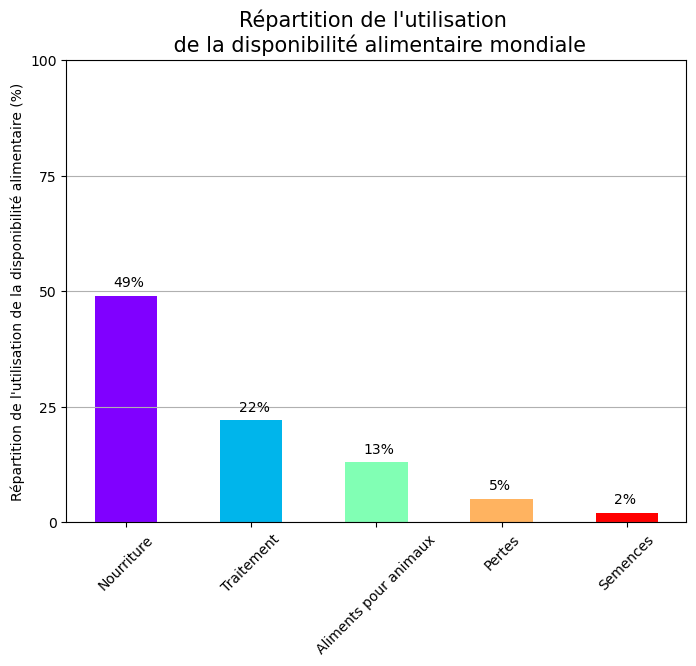

In [190]:
#Création d'un liste d'utilisation alimentaire

liste_utilisation = ['Nourriture', 'Traitement', 'Aliments pour animaux', 'Pertes','Semences']

#Calcul de la somme en kg par utilisation alimentaire

somme_utilisation_kg = join_population_dispo_alimentaire_2017['total_utilisation_dispo_alim'].sum()

for x in liste_utilisation :
    print("proportion utilisation mondiale ", x,":","{:.0f}".format(join_population_dispo_alimentaire_2017[x].sum()
                                                                    * 100 / somme_utilisation_kg),"%")
    
#Création du graphique représentant la répartition de l'utilisation de la disponibilité alimentaire
    
proportion_resultat=[49,22,13,5,2]

plt.figure(figsize = (8,6))
plt.bar(liste_utilisation,proportion_resultat, 
        width = 0.5, 
        color = cm.rainbow(np.linspace(0, 1, 5)))
plt.title("Répartition de l'utilisation \n de la disponibilité alimentaire mondiale",
          fontsize=15)
plt.ylabel("Répartition de l'utilisation de la disponibilité alimentaire (%)",fontsize=10)
plt.xlabel("", fontsize = 10)
plt.grid(axis = 'y')
plt.ylim(0,100)
plt.yticks([0,25,50,75,100])
plt.xticks(rotation = 45, ha = "center")

for i in range(5):
    plt.text(i-0.1,proportion_resultat[i]+2,str(proportion_resultat[i])+'%')

plt.show()

## 2.6 Analyse sur les céréales

In [191]:
# Reroupement du datafram par catégorie de produit alimentaire

regroupement_produit = join_population_dispo_alimentaire_2017.groupby('Produit').sum().reset_index()
regroupement_produit.head()

dispo_alimentaire['Produit'].unique()

#Création d'un dataframe qu'avec les céréales qui nous intéressent

focus_cereales = regroupement_produit.loc[regroupement_produit['Produit']
                                       .isin(['Blé','Riz (Eq Blanchi)', 'Orge', 'Maïs', 'Seigle', 'Avoine', 
                                              'Millet','Sorgho','Céréales'])]
focus_cereales.head(10)

#Calcul de la proportion de céréales utilisées pour la nourriture humaine par type de céréales

proportion_humains_cereales = round((focus_cereales['Nourriture']
                                     / focus_cereales['Disponibilite interieure']) * 100)
focus_cereales['proportion_humains_cereales'] = proportion_humains_cereales

#Calcul de la proportion de céréales utilisées pour les animaux par type de céréales

proportion_animaux_cereales = round((focus_cereales['Aliments pour animaux']
                                     / focus_cereales['Disponibilite interieure']) * 100)
focus_cereales['proportion_animaux_cereales'] = proportion_animaux_cereales

#Ajout des colonnes de proportions utilisées par les humains et les animaux dans le dataframe céréales

focus_cereales[['Produit','proportion_humains_cereales', 'proportion_animaux_cereales']]

#Calcul global de l'utilisation des céréales comme nourriture pour les humains

total_utilisation_cereales_humains = round((focus_cereales['Nourriture'].sum()
                                            / focus_cereales['Disponibilite interieure'].sum()) * 100)
print("{} % des céreales sont utilisées comme nourriture pour les humains.".format(total_utilisation_cereales_humains))

#Calcul global de l'utilisation des céréales comme nourriture pour les animaux

total_utilisation_cereales_animaux = round((focus_cereales['Aliments pour animaux'].sum()
                                            / focus_cereales['Disponibilite interieure'].sum()) * 100)
print("{} % des céreales sont utilisées comme nourriture pour les animaux.".format(total_utilisation_cereales_animaux))

43 % des céreales sont utilisées comme nourriture pour les humains.
36 % des céreales sont utilisées comme nourriture pour les animaux.


C:\Users\joyeu\AppData\Local\Temp\ipykernel_41372\1863552067.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  focus_cereales['proportion_humains_cereales'] = proportion_humains_cereales
C:\Users\joyeu\AppData\Local\Temp\ipykernel_41372\1863552067.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  focus_cereales['proportion_animaux_cereales'] = proportion_animaux_cereales


## 2.7 Calcul proportion de personnes en sous nutrition par pays

                                            Zone  Annee  Population  \
526                                        Haïti   2017    10982366   
1090  République populaire démocratique de Corée   2017    25429825   
772                                   Madagascar   2017    25570512   
736                                      Libéria   2017     4702226   
718                                      Lesotho   2017     2091534   
1300                                       Tchad   2017    15016753   
1120                                      Rwanda   2017    11980961   
874                                   Mozambique   2017    28649018   
1318                                 Timor-Leste   2017     1243258   
4                                    Afghanistan   2017    36296113   

      Sous_Nutrition_(M)  pourcentage_population_sous_nutrition  
526              5300000                                  48.26  
1090            12000000                                  47.19  
772             1050

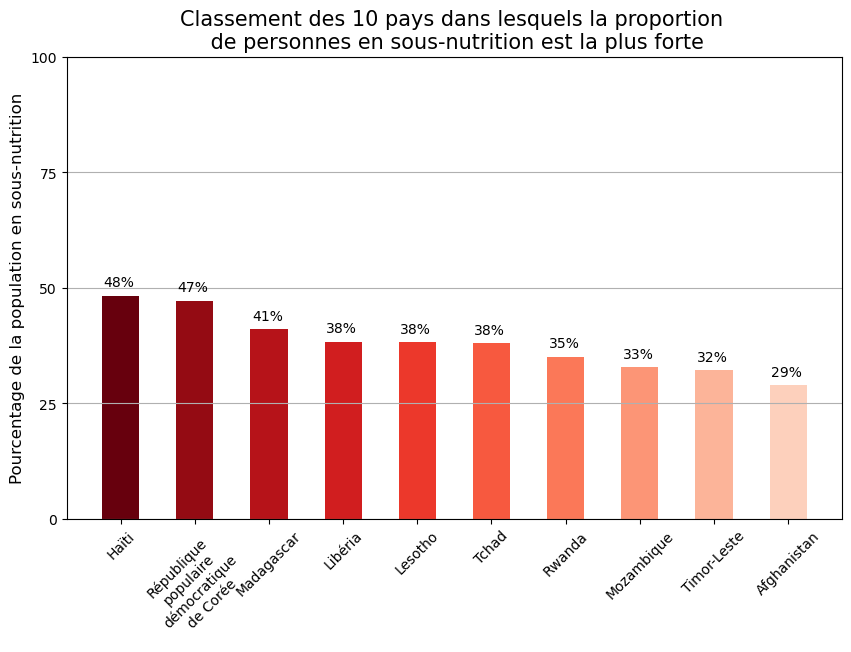

In [192]:
#tri du dataframe join_population_sous_nutrition_2017 par poucentage de population décroissant 

top_10_pays_sous_nutrition = join_population_sous_nutrition_2017.sort_values(
    'pourcentage_population_sous_nutrition', ascending=False).head(10)
print(top_10_pays_sous_nutrition)

#passage à la lisgne pour les noms de pays trop longs

top_10_pays_sous_nutrition['Zone'] = ['\n'.join(wrap(x, 12)) for x in top_10_pays_sous_nutrition['Zone']]

#Création du graphique

plt.figure(figsize = (10,6))
plt.bar(height = top_10_pays_sous_nutrition['pourcentage_population_sous_nutrition'], 
        x = top_10_pays_sous_nutrition['Zone'], 
        width = 0.5, 
        color = cm.Reds_r(np.linspace(0, 1, 12)))
plt.title("Classement des 10 pays dans lesquels la proportion \n de personnes en sous-nutrition est la plus forte",
          fontsize = 15)
plt.ylabel("Pourcentage de la population en sous-nutrition",fontsize = 12)
plt.xlabel("", fontsize = 12)
plt.grid(axis = 'y')
plt.ylim(0,100)
plt.yticks([0,25,50,75,100])
plt.xticks(rotation = 45, ha = "center")

proportion = top_10_pays_sous_nutrition['pourcentage_population_sous_nutrition'].tolist()
for i in range(10):
    plt.text(i-0.23,proportion[i] + 2,str(round(proportion[i])) + '%')
             
plt.show()

## 2.8 Calcul liste des 10 pays ayant bénéficié le plus d'aide entre 2013 et 2016

     index         Zone  Annee                   Produit  Aide_alimentaire(kg)
0        1  Afghanistan   2014       Autres non-céréales                335000
1        3  Afghanistan   2014              Blé et Farin              15160000
2        5  Afghanistan   2014                  Céréales              15989000
3        8  Afghanistan   2014          Huiles végétales               8185000
4       10  Afghanistan   2014  Légumineuses Sèches,Tot.               4010000
..     ...          ...    ...                       ...                   ...
951   1467     Zimbabwe   2014  Légumineuses Sèches,Tot.                796000
952   1469     Zimbabwe   2014  Mélanges et préparations               5124000
953   1470     Zimbabwe   2015  Mélanges et préparations                 96000
954   1472     Zimbabwe   2014              Non-céréales               2310000
955   1473     Zimbabwe   2015              Non-céréales                306000

[956 rows x 5 columns]
                         Zon

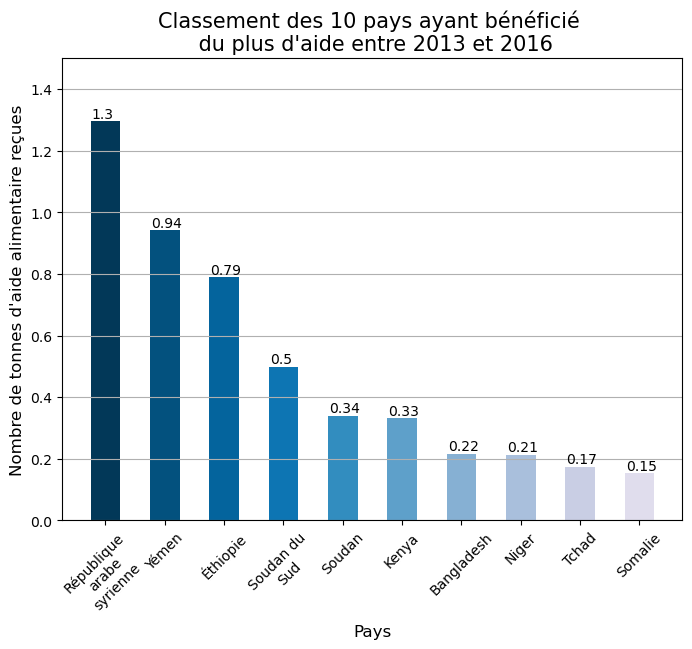

In [193]:
aide_alimentaire.head()

#Sélection des 3 années voules dans l'analyse

aide_focus_2013_a_2016 = aide_alimentaire.loc[(aide_alimentaire['Annee'] == 2014)
                                              | (aide_alimentaire['Annee'] == 2015) 
                                              | (aide_alimentaire['Annee'] == 2016), :].reset_index()
print(aide_focus_2013_a_2016)

#Somme totale d'aide reçues entre 2014 et 2016 par pays

nb_kg_aide_2013_2016_total = aide_focus_2013_a_2016.groupby(['Zone'])['Aide_alimentaire(kg)'].sum().reset_index()
nb_kg_aide_2013_2016_total.head()

top10_pays_aide = nb_kg_aide_2013_2016_total.sort_values('Aide_alimentaire(kg)', ascending = False).head(10)

top10_pays_aide['Tonnes'] = top10_pays_aide['Aide_alimentaire(kg)'] / 1000000000

top10_pays_aide.set_index('Zone')
print(top10_pays_aide)

top10_pays_aide['Zone'] = ['\n'.join(wrap(x, 12)) for x in top10_pays_aide['Zone']]

#Création du graphique correspondant

plt.figure(figsize = (8,6))
plt.bar(height = top10_pays_aide["Tonnes"],
        x = top10_pays_aide['Zone'],
        width = 0.5,
        color = cm.PuBu_r(np.linspace(0, 1, 12)))
plt.title("Classement des 10 pays ayant bénéficié \n du plus d'aide entre 2013 et 2016",
          fontsize = 15)
plt.ylabel("Nombre de tonnes d'aide alimentaire reçues",
           fontsize = 12)
plt.xlabel("Pays",fontsize = 12)
plt.grid(axis ='y')
plt.ylim(0,1.5)
plt.xticks(rotation = 45, ha ='center')

proportion_aide = top10_pays_aide['Tonnes'].tolist()
for i in range(10):
    plt.text(i-0.23,proportion_aide[i]+0.01,round(proportion_aide[i],2))
    
plt.show()

## 2.9 Calcul évolution des 5 pays ayant reçu le plus d'aide.

                          Zone  Annee  Aide_alimentaire(kg)    Tonnes
157  République arabe syrienne   2013             563566000  0.563566
158  République arabe syrienne   2014             651870000  0.651870
159  République arabe syrienne   2015             524949000  0.524949
160  République arabe syrienne   2016             118558000  0.118558
189                     Soudan   2013             330230000  0.330230
190                     Soudan   2014             321904000  0.321904
191                     Soudan   2015              17650000  0.017650
192              Soudan du Sud   2013             196330000  0.196330
193              Soudan du Sud   2014             450610000  0.450610
194              Soudan du Sud   2015              48308000  0.048308
214                      Yémen   2013             264764000  0.264764
215                      Yémen   2014             103840000  0.103840
216                      Yémen   2015             372306000  0.372306
217                 

C:\Users\joyeu\AppData\Local\Temp\ipykernel_41372\1556941957.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  focus_evolution_5_pays['Tonnes'] = focus_evolution_5_pays['Aide_alimentaire(kg)'] / 1000000000


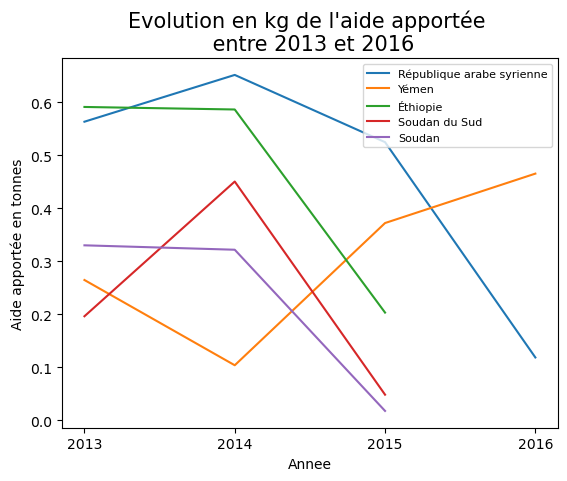

In [194]:
#Regroupement du dataframe aide_alimentaire par pays

aide_par_pays = aide_alimentaire.groupby(['Zone','Annee'])['Aide_alimentaire(kg)'].sum().reset_index()

# Sélection des 5 pays ayants bénéficié du plus d'aide pour observer l'évolution de l'aide qu'ils ont reçue

focus_evolution_5_pays = aide_par_pays.loc[(aide_par_pays['Zone'] == 'République arabe syrienne')
                                                            | (aide_par_pays['Zone'] == "Yémen")
                                                            | (aide_par_pays['Zone'] == 'Éthiopie')
                                                            | (aide_par_pays['Zone'] == 'Soudan du Sud')
                                                            | (aide_par_pays['Zone'] == 'Soudan'), :]

focus_evolution_5_pays['Tonnes'] = focus_evolution_5_pays['Aide_alimentaire(kg)'] / 1000000000
print(focus_evolution_5_pays)

#créationde 5 dataframe selon les 5 pays pour poivoir créer le graphique correspondant

df1 = focus_evolution_5_pays.loc[focus_evolution_5_pays['Zone'] == "République arabe syrienne",:]
df2 = focus_evolution_5_pays.loc[focus_evolution_5_pays['Zone'] == "Yémen",:]
df3 = focus_evolution_5_pays.loc[focus_evolution_5_pays['Zone'] == "Éthiopie",:]
df4 = focus_evolution_5_pays.loc[focus_evolution_5_pays['Zone'] == "Soudan du Sud",:]
df5 = focus_evolution_5_pays.loc[focus_evolution_5_pays['Zone'] == 'Soudan',:]

#Création du graphique correspondant

plt.plot(df1['Annee'], df1['Tonnes'], label = "République arabe syrienne")
plt.plot(df2['Annee'], df2['Tonnes'], label = "Yémen")
plt.plot(df3['Annee'], df3['Tonnes'], label = "Éthiopie")
plt.plot(df4['Annee'], df4['Tonnes'], label = "Soudan du Sud")
plt.plot(df5['Annee'], df5['Tonnes'], label = "Soudan")
plt.title("Evolution en kg de l'aide apportée \n entre 2013 et 2016",position=(0.5, 0,7), fontsize= 15)
plt.ylabel("Aide apportée en tonnes")
plt.xlabel("Annee")
plt.xticks([2013,2014,2015,2016])
plt.legend(loc='upper right',fontsize=8)

plt.show()

## 2.10 Calcul des 10 pays ayants la plus forte disponibilité alimentaire par habitant

C:\Users\joyeu\AppData\Local\Temp\ipykernel_41372\3941237744.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pays_regroupes = join_population_dispo_alimentaire_2017.groupby('Zone')\


                      Zone  dispo_calories_mondial_2017    Population  \
0              Afghanistan                 2.764875e+13  2.177767e+09   
1           Afrique du Sud                 6.284185e+13  5.415927e+09   
2                  Albanie                 3.356077e+12  2.653435e+08   
3                  Algérie                 4.974753e+13  3.849195e+09   
4                Allemagne                 1.056866e+14  7.852549e+09   
..                     ...                          ...           ...   
167    Émirats arabes unis                 1.134077e+13  8.728227e+08   
168               Équateur                 1.437314e+13  1.594609e+09   
169  États-Unis d'Amérique                 4.368912e+14  3.088305e+10   
170               Éthiopie                 8.268178e+13  9.788793e+09   
171           Îles Salomon                 5.532235e+11  4.961104e+07   

     Disponibilite interieure  Disponibilite alimentaire (cal/personne/jour)  \
0                1.351500e+10              

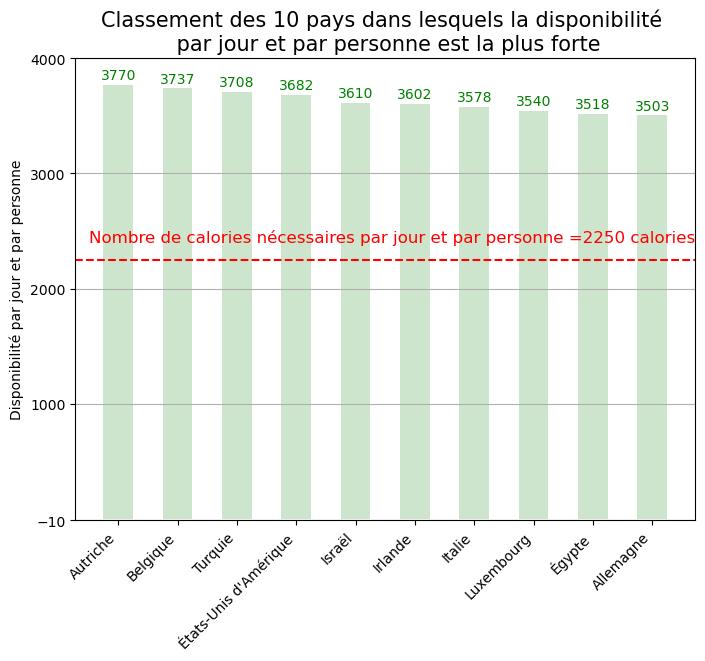

In [195]:
#Regroupement du dataframe polpulation dispo alimentaire par pays

pays_regroupes = join_population_dispo_alimentaire_2017.groupby('Zone')\
                ['dispo_calories_mondial_2017',
                 'Population',
                 'Disponibilite interieure',
                 'Disponibilite alimentaire (cal/personne/jour)',
                 'Importations',
                 'Exportations',
                 'Production'].sum().reset_index()
print(pays_regroupes)

#Filtre des 10 pays ayant la plus fort disponibilité alimentaire par habitant

top10_pays_plus_forte_dispo_hab = pays_regroupes.sort_values('Disponibilite alimentaire (cal/personne/jour)',
                                                             ascending = False).head(10)
print(top10_pays_plus_forte_dispo_hab)

#Création du graphique correspondant

plt.figure(figsize = (8,6))
plt.bar(height = top10_pays_plus_forte_dispo_hab['Disponibilite alimentaire (cal/personne/jour)'], 
        x = top10_pays_plus_forte_dispo_hab ['Zone'], 
        width = 0.5, 
        color = 'green', alpha = 0.2)
plt.title("Classement des 10 pays dans lesquels la disponibilité \n par jour et par personne est la plus forte",
          fontsize = 15)
plt.ylabel("Disponibilité par jour et par personne",fontsize = 10)
plt.xlabel("", fontsize = 10)
plt.grid(axis = 'y')
plt.ylim(0,4000)
plt.yticks([-10,1000,2000,3000,4000])
plt.xticks(rotation = 45, ha = "right")
plt.axhline( y= 2250,  c ='red', linestyle ='--')

dispo_liste = top10_pays_plus_forte_dispo_hab['Disponibilite alimentaire (cal/personne/jour)'].tolist()
for i in range(10):
    plt.text(i-0.3,dispo_liste[i ] + 50,round(dispo_liste[i]), c ='green')

plt.text(-0.5,2400,'Nombre de calories nécessaires par jour et par personne =2250 calories', c ='red', fontsize = 12)

plt.show()

## 2.11 Calcul des 10 pays ayants la plus faible disponibilité alimentaire par habitant

                                           Zone  dispo_calories_mondial_2017  \
170                                    Éthiopie                 8.268178e+13   
114                                     Ouganda                 3.194486e+13   
165                                    Zimbabwe                 1.097990e+13   
150                                       Tchad                 1.155967e+13   
132  République populaire démocratique de Corée                 1.942699e+13   
65                                        Haïti                 8.373889e+12   
0                                   Afghanistan                 2.764875e+13   
91                                   Madagascar                 1.918914e+13   
164                                      Zambie                 1.183561e+13   
127                   République centrafricaine                 3.152113e+12   

       Population  Disponibilite interieure  \
170  9.788793e+09              4.401400e+10   
114  3.910826e+09        

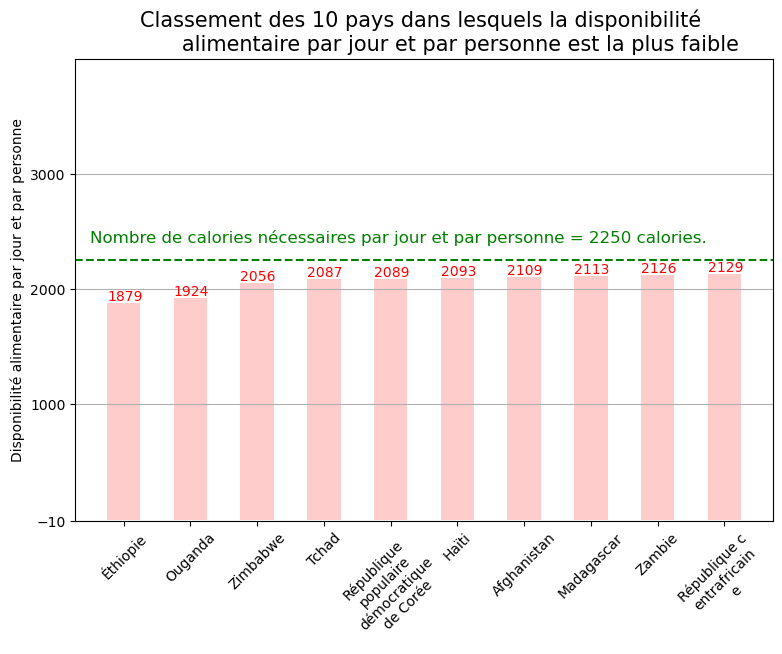

In [221]:
#Tri et sélection des 10 pays avec la disponibilité alimentaire par personne et par jour la plus faible

top10_pays_plus_faible_dispo_hab = pays_regroupes.sort_values(
    'Disponibilite alimentaire (cal/personne/jour)',ascending = False).tail(10)
print(top10_pays_plus_faible_dispo_hab)

top10_pays_plus_faible_dispo_hab_trié = top10_pays_plus_faible_dispo_hab.sort_values(
    'Disponibilite alimentaire (cal/personne/jour)')

top10_pays_plus_faible_dispo_hab_trié['Zone'] = ['\n'.join(
    wrap(x, 12)) for x in top10_pays_plus_faible_dispo_hab['Zone']]

#Création du graphique correspondants

plt.figure(figsize = (9,6))
plt.bar(height = top10_pays_plus_faible_dispo_hab_trié['Disponibilite alimentaire (cal/personne/jour)'], 
        x = top10_pays_plus_faible_dispo_hab_trié['Zone'], 
        width = 0.5, 
        color = 'red', alpha = 0.2)
plt.title("Classement des 10 pays dans lesquels la disponibilité \n \
          alimentaire par jour et par personne est la plus faible",
          fontsize = 15)
plt.ylabel("Disponibilité alimentaire par jour et par personne",fontsize = 10)
plt.xlabel("", fontsize = 10)
plt.grid(axis = 'y')
plt.ylim(0,4000)
plt.yticks([-10,1000,2000,3000])
plt.xticks(rotation = 45, ha = "center")
plt.axhline(y = 2250, c ='green', linestyle ='--')

dispo_liste_insuffisante = top10_pays_plus_faible_dispo_hab_trié[
    'Disponibilite alimentaire (cal/personne/jour)'].tolist()
for i in range(10):
    plt.text(i-0.25,dispo_liste_insuffisante[i] + 20,round(dispo_liste_insuffisante[i]),c ='red')

plt.text(-0.5,2400,'Nombre de calories nécessaires par jour et par personne = 2250 calories.',
         c ='green', fontsize = 12)
plt.show()

## 2.13 Focus Thaïlande

In [223]:
#Création Dataframe population sous nutrition focus sur la Thaïlande

focus_sous_nutrition_Thailande = join_population_sous_nutrition_2017.loc\
                                        [join_population_sous_nutrition_2017['Zone'] == 'Thaïlande']
focus_sous_nutrition_Thailande.head()

#Rappel du calcul ayant servi a calculé la colonne pourcentage_population_sous_nutrition

pourcentage_sous_nutrition_Thailande = join_population_sous_nutrition_2017.loc\
                                        [join_population_sous_nutrition_2017[
                                        'Zone'] == 'Thaïlande','pourcentage_population_sous_nutrition'].sum()
print(str(pourcentage_sous_nutrition_Thailande) +" %"+" de la population Thaï est en sous-nutrition.")

#Création Dataframe population dispo alimentaire focus sur la Thaïlande

focus_dispo_alimentaire_Thailande = join_population_dispo_alimentaire_2017[
    join_population_dispo_alimentaire_2017['Zone'] == 'Thaïlande']

focus_dispo_alimentaire_Thailande.head()

#Création Dataframe dispo alimentaire groupé par produit focus sur la Thaïlande

focus_dispo_alimentaire_Thailande.groupby('Produit').sum()

focus_dispo_alimentaire_Thailande.sort_values('Production', ascending=False).head(15)

#Calcul de la proportion exportée de la production par produit focus Thaïlande
proportion_exportee = round(focus_dispo_alimentaire_Thailande['Exportations']
                            /focus_dispo_alimentaire_Thailande['Production']*100,2)

#Rajout de la colonne proportion exportée au data frameFocus_dispo_alimentaire_Thailande

focus_dispo_alimentaire_Thailande['proportion_exportee'] = proportion_exportee

#Sélection de certaines colonnes du data frame Focus_dispo_alimentaire_Thailande
#pour plus de visibilité et pour un focus sur le produit manioc

focus_manioc_Thailande = focus_dispo_alimentaire_Thailande.loc[\
                                                               focus_dispo_alimentaire_Thailande['Produit'] == 'Manioc',
                                                               ['Zone',
                                                                'Annee',
                                                                'Population',
                                                                'Disponibilite interieure',
                                                                'Exportations',
                                                                'Importations',
                                                                'Nourriture',
                                                                'Production',
                                                                'proportion_exportee']]


#Calcul de le proportion de la production de manioc exportée

exportation_de_manioc = focus_manioc_Thailande['proportion_exportee'].sum()
print("{} % de la production de manioc de la Thaïlande est exportée".format(exportation_de_manioc))

#Calcul de la disponibilité en calorie par personne et par jour pour une personne en Thaïlande

dispo_calories_personne_jour_Thailande = focus_dispo_alimentaire_Thailande[
    'Disponibilite alimentaire (cal/personne/jour)'].sum()
print("La disponibilité alimentaire pour une personne en Thaïlande est de " 
      + str(dispo_calories_personne_jour_Thailande)\
      + " calories par jour et par personne.")



8.96 % de la population Thaï est en sous-nutrition.
83.41 % de la production de manioc de la Thaïlande est exportée
La disponibilité alimentaire pour une personne en Thaïlande est de 2785.0 calories par jour et par personne.


C:\Users\joyeu\AppData\Local\Temp\ipykernel_41372\1975607927.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  focus_dispo_alimentaire_Thailande['proportion_exportee'] = proportion_exportee


# 3 Analyses complémentaires

## 3.1 Distribution de la disponibilité alimentaire par jour/personne 

In [198]:
#Jointure entre population 2017 sous nutrition 2017 et pays regroupés

join_population_sous_nutrition_dispo_alimentaire_pays = pd.merge(
    join_population_sous_nutrition_2017, pays_regroupes, on = 'Zone', how='outer')

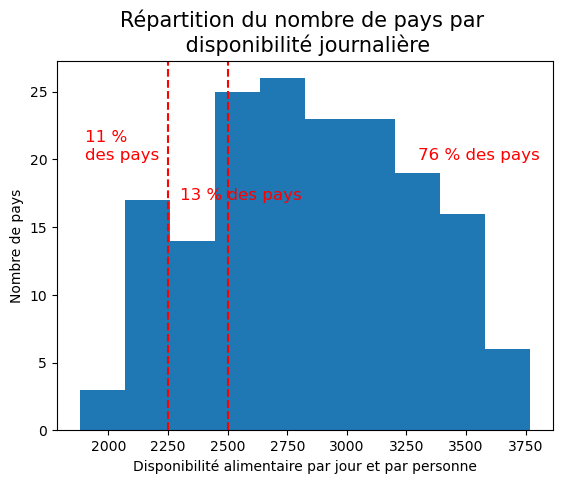

In [199]:
#Création d'un histogramme pour voir la distribution de la disponibilité alimentaire par jour et par personne.

fig, ax = plt.subplots(1,1)

liste_dispo_cal = join_population_sous_nutrition_dispo_alimentaire_pays[
    'Disponibilite alimentaire (cal/personne/jour)'].tolist()

n, bins, patches = ax.hist((liste_dispo_cal))
    
ax.set_ylabel('Nombre de pays')
ax.set_xlabel('Disponibilité alimentaire par jour et par personne')
plt.title("Répartition du nombre de pays par \n disponibilité journalière",fontsize = 15)

#Calcul de pourcentage de pays qui n'ont pas une disponibilité 
#journalière suffisante et ceux qui en ont une trop importante

total_nb_dispo = join_population_sous_nutrition_dispo_alimentaire_pays[
    'Disponibilite alimentaire (cal/personne/jour)'].count()

filtre_pays_dispo_insu = join_population_sous_nutrition_dispo_alimentaire_pays.loc[(
    join_population_sous_nutrition_dispo_alimentaire_pays[
    'Disponibilite alimentaire (cal/personne/jour)'] < 2250),('Disponibilite alimentaire (cal/personne/jour)')]

nb_pays_dispo_insu = filtre_pays_dispo_insu.count()

filtre_pays_dispo_suppl = join_population_sous_nutrition_dispo_alimentaire_pays.loc[(
    join_population_sous_nutrition_dispo_alimentaire_pays[
    'Disponibilite alimentaire (cal/personne/jour)'] > 2500),('Disponibilite alimentaire (cal/personne/jour)')]

nb_pays_dispo_suppl = filtre_pays_dispo_suppl.count()

filtre_pays_dispo_moy = join_population_sous_nutrition_dispo_alimentaire_pays.loc[(
    join_population_sous_nutrition_dispo_alimentaire_pays[
    'Disponibilite alimentaire (cal/personne/jour)'] > 2250) & (
    join_population_sous_nutrition_dispo_alimentaire_pays[
    'Disponibilite alimentaire (cal/personne/jour)'] < 2500),('Disponibilite alimentaire (cal/personne/jour)')]

nb_pays_dispo_moy = filtre_pays_dispo_moy.count()

pourcentage_pays_dispo_insu = round(nb_pays_dispo_insu / total_nb_dispo * 100)
pourcentage_pays_dispo_suppl = round(nb_pays_dispo_suppl / total_nb_dispo * 100)
pourcentage_pays_dispo_moy = round(nb_pays_dispo_moy / total_nb_dispo * 100)

#Mise en place de deux lignes de délimitation et de l'inscription du pourcentage

plt.axvline(x = 2250, c ='red', linestyle ='--')
plt.axvline(x = 2500, c ='red', linestyle ='--')

plt.text(1900,20,f"{pourcentage_pays_dispo_insu} %\ndes pays",c ='red', fontsize = 12)
plt.text(3300,20,f"{pourcentage_pays_dispo_suppl} % des pays",c ='red', fontsize = 12)
plt.text(2300,17,f"{pourcentage_pays_dispo_moy} % des pays",c ='red', fontsize = 12)

plt.show()

## 3.2 Nombre de pays n'ayants pas une disponibilité alimentaire journalière suffisante

In [200]:
#Filtre des pays ayant n'ayant pas une disponibilité alimentaire suffisante par jour et par habitant en 2017

pays_sous_nutrition_dispo_minimum = join_population_sous_nutrition_dispo_alimentaire_pays.loc[(
    join_population_sous_nutrition_dispo_alimentaire_pays['Disponibilite alimentaire (cal/personne/jour)'] < 2250)]

nombre_pays_sous_nutrition_dispo_minimum = pays_sous_nutrition_dispo_minimum['Zone'].count()
print("{} pays n'ont pas une disponibilité alimentaire suffisante pa jour et par habitant en 2017.".format(
    nombre_pays_sous_nutrition_dispo_minimum))

19 pays n'ont pas une disponibilité alimentaire suffisante pa jour et par habitant en 2017.


## 3.3 Recherche d'un lien de corrélation entre la disponibilité d'un pays, sa production, ses importations et ses exportations

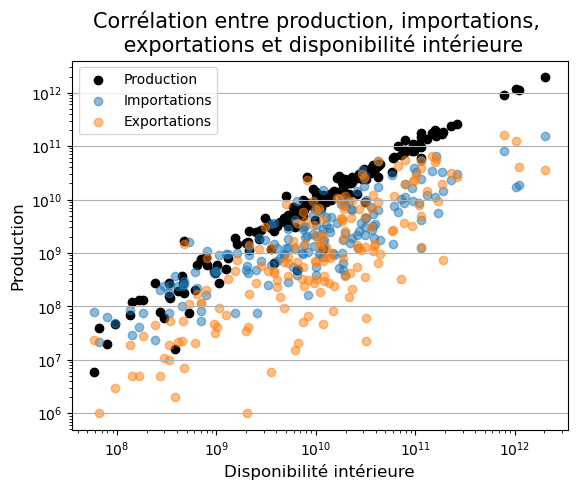

In [201]:
#Nuage de points pour mettre évidence une corrélation entr disponibilité intérieurs, production, importations et exportations

plt.scatter(x = pays_regroupes['Disponibilite interieure'],
            y = pays_regroupes['Production'], c ='black')
plt.scatter(x =   pays_regroupes['Disponibilite interieure'],
            y = pays_regroupes['Importations'],alpha = 0.5)
plt.scatter(x =   pays_regroupes['Disponibilite interieure'],
            y = pays_regroupes['Exportations'] ,alpha = 0.5)
plt.title("Corrélation entre production, importations, \n exportations et disponibilité intérieure",
          fontsize = 15)
plt.semilogx()
plt.semilogy()
plt.xlabel("Disponibilité intérieure",
           fontsize = 12)
plt.ylabel("Production",
           fontsize = 12)
plt.legend(('Production', 'Importations','Exportations'))
plt.grid(axis = 'y')

plt.show()

## 3.4 Calcul des 10 pays les plus en difficultés, car production très faible et disponibilité alimentaire insuffisante

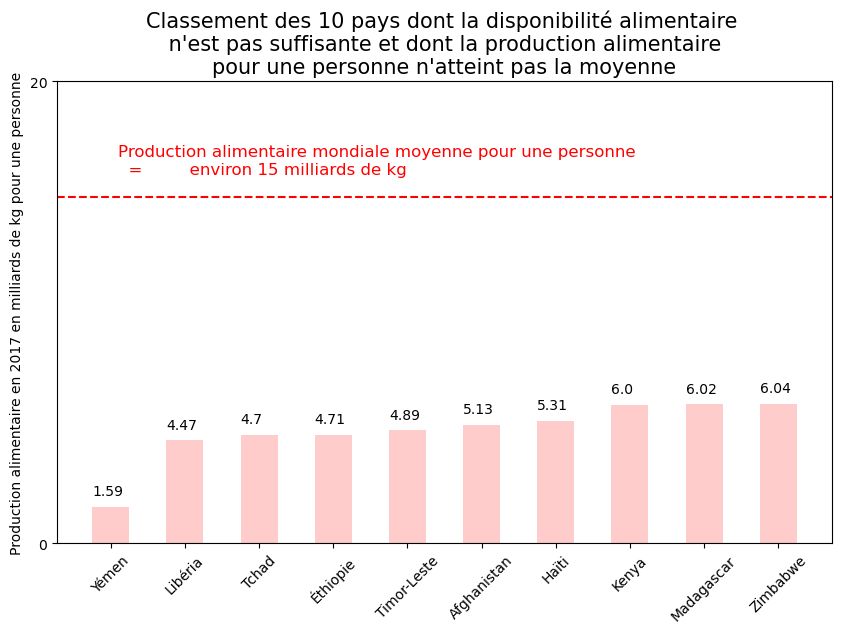

In [202]:
#Calcul de la moyenne de la quantité de production par pays par personne

production = join_population_sous_nutrition_dispo_alimentaire_pays['Production']
population_totale = join_population_sous_nutrition_dispo_alimentaire_pays['Population_y']
production_par_habitant = production / population_totale
production_par_habitant_moyenne = round(production_par_habitant.mean())

join_population_sous_nutrition_dispo_alimentaire_pays['production_par_habitant'] = production_par_habitant

#Filtre pays n'atteignant par la moyenne de la production mondiale par habitant
#et ayant une disponibilité alimentaire inférieur au besoin moyenn journalier humain.

pays_production_inferieur_moyenne = join_population_sous_nutrition_dispo_alimentaire_pays.loc[
    (join_population_sous_nutrition_dispo_alimentaire_pays['production_par_habitant'] < production_par_habitant_moyenne) 
    & (join_population_sous_nutrition_dispo_alimentaire_pays[
        'Disponibilite alimentaire (cal/personne/jour)'] < 2250)].sort_values('production_par_habitant').head(10)

#Représentation graphique 10 pays les plus en difficultés, 
#car production très faible et disponibilité alimentaire insuffisante

plt.figure(figsize = (10,6))

plt.bar(height = pays_production_inferieur_moyenne['production_par_habitant'], 
        x = pays_production_inferieur_moyenne['Zone'], 
        width = 0.5, 
        color = 'r',
        alpha = 0.2)
plt.title("Classement des 10 pays dont la disponibilité alimentaire \n\
n'est pas suffisante et dont la production alimentaire \npour une personne n'atteint pas la moyenne",
          fontsize = 15, y = 1.0)
plt.ylabel("Production alimentaire en 2017 en milliards de kg pour une personne",fontsize = 10)
plt.xlabel("", fontsize = 10)
plt.grid(axis = 'y')
plt.xticks(rotation = 45, ha = "center")
plt.yticks([0,20])
plt.xticks(rotation = 45, ha = "center")
plt.axhline(y = 15, c ='red', linestyle ='--')

quantite_production = pays_production_inferieur_moyenne['production_par_habitant'].tolist()
for i in range(10):
    plt.text(i-0.25, quantite_production[i]+ 0.5, round(quantite_production[i],2), c ='black')

plt.text(0.1,16,'Production alimentaire mondiale moyenne pour une personne \n  = \
        environ 15 milliards de kg',c ='red', fontsize = 12)

plt.show()

In [203]:
join_population_sous_nutrition_dispo_alimentaire_pays.loc[
    join_population_sous_nutrition_dispo_alimentaire_pays['production_par_habitant'] < production_par_habitant_moyenne]

,Zone,Annee,Population_x,Sous_Nutrition_(M),pourcentage_population_sous_nutrition,dispo_calories_mondial_2017,Population_y,Disponibilite interieure,Disponibilite alimentaire (cal/personne/jour),Importations,Exportations,Production,production_par_habitant
0,Afghanistan,2017,36296113,10500000,28.93,2.764875e+13,2.177767e+09,1.351500e+10,2087.0,2.988000e+09,2.780000e+08,1.117100e+10,5.129567
1,Afrique du Sud,2017,57009756,3100000,5.44,6.284185e+13,5.415927e+09,6.125600e+10,3020.0,7.517000e+09,1.167400e+10,6.326300e+10,11.680919
2,Albanie,2017,2884169,100000,3.47,3.356077e+12,2.653435e+08,4.758000e+09,3188.0,9.330000e+08,9.400000e+07,3.964000e+09,14.939123
3,Algérie,2017,41389189,1300000,3.14,4.974753e+13,3.849195e+09,4.263000e+10,3293.0,1.740300e+10,6.550000e+08,2.635900e+10,6.847926
6,Angola,2017,29816766,5800000,19.45,2.692484e+13,2.385341e+09,3.202900e+10,2474.0,4.416000e+09,2.300000e+07,2.885700e+10,12.097640
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Venezuela (République bolivarienne du),2017,29402484,8000000,27.21,2.825711e+13,2.822638e+09,3.228700e+10,2633.0,9.604000e+09,6.200000e+07,2.386800e+10,8.455918
232,Viet Nam,2017,94600648,6500000,6.87,9.474823e+13,7.568052e+09,9.513400e+10,2744.0,9.217000e+09,2.263800e+10,1.082750e+11,14.306852
233,Yémen,2017,27834819,3577561,12.85,2.252407e+13,2.588638e+09,9.782000e+09,2217.0,6.786000e+09,7.190000e+08,4.125000e+09,1.593502
234,Zambie,2017,16853599,2166164,12.85,1.183561e+13,1.567385e+09,1.004100e+10,1924.0,3.800000e+08,6.750000e+08,1.052600e+10,6.715645


## 3.5 Evolution de l'aide apportée vs sous-nutrition

[4.17, 3.94, 2.19, 0.74]
[907.421526, 909.993701, 957.038093, 971.239109]


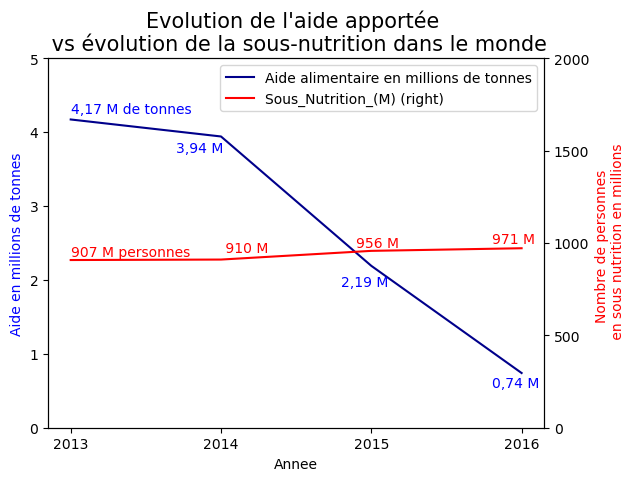

In [204]:
#Regroupement par année du dataframe aide par pays

total_aide = aide_par_pays.groupby('Annee').sum().reset_index()

focus_sous_nutrition2013_2016 = join_population_sous_nutrition.loc[(sous_nutrition['Annee'] == 2013)
                                              | (join_population_sous_nutrition['Annee'] == 2014)
                                              | (join_population_sous_nutrition['Annee'] == 2015) 
                                              | (join_population_sous_nutrition['Annee'] == 2016), :].reset_index()
total_sous_nutrition = focus_sous_nutrition2013_2016.groupby('Annee').sum().reset_index()
total_sous_nutrition.head()

# Converson du nombre de personnes en sous_nutrition en millions

total_sous_nutrition['Sous_Nutrition_(M)'] = total_sous_nutrition['Sous_Nutrition_(M)'] / 1000000

#Conversion de l'aide apporté en millions de tonnes

total_aide['Aide alimentaire en millions de tonnes'] = round(total_aide['Aide_alimentaire(kg)'] / 1000000000,2)

#Création du graphique correspondant

ax = total_aide.plot(kind='line', x ='Annee', y = 'Aide alimentaire en millions de tonnes', color ='DarkBlue')

ax2 = total_sous_nutrition.plot(kind ='line', x = 'Annee', y ='Sous_Nutrition_(M)',
                                secondary_y = True,color ='Red', ax = ax)

ax.set_yticks([0,1,2,3, 4, 5],c ='b')
ax2.set_yticks([0,500, 1000, 1500,2000], c ='r')

ax.set_ylabel('Aide en millions de tonnes',c ='b')
ax2.set_ylabel('Nombre de personnes \n en sous nutrition en millions',c ='r')
plt.title("Evolution de l'aide apportée \n vs évolution de la sous-nutrition dans le monde",fontsize = 15, y = 1)

label_aide = total_aide['Aide alimentaire en millions de tonnes'].tolist()
Annee_aide = total_aide['Annee'].tolist()

label_sous_nutrition = total_sous_nutrition['Sous_Nutrition_(M)'].tolist()

print(label_aide)
print(label_sous_nutrition)

plt.text(2013, 1700, '4,17 M de tonnes', c ='b')
plt.text(2014-0.3, 1490, '3,94 M ', c ='b')
plt.text(2015-0.2, 765, '2,19 M ', c ='b')
plt.text(2016-0.2, 220, '0,74 M ', c ='b')

plt.text(2013, 930, '907 M personnes', c ='r')
plt.text(2014, 950, ' 910 M', c ='r')
plt.text(2015-0.1, 980, '956 M', c ='r')
plt.text(2016-0.2, 1000, '971 M', c ='r')
    
plt.xticks([2013,2014,2015,2016])
plt.show()

## 3.6 Analyse pays qui ne devraient pas avoir une population en sous-nutrition

In [205]:
#Filtre des pays ayant une partie de sa population en sous nutrtion
#alors qu'ils disposent d'une disponibilité alimentaire suffisante pour nourrir leur population

pays_sous_nutrition_dispo_supplementaire = join_population_sous_nutrition_dispo_alimentaire_pays.loc[(
    join_population_sous_nutrition_dispo_alimentaire_pays['pourcentage_population_sous_nutrition'] > 0)
    & (join_population_sous_nutrition_dispo_alimentaire_pays['Disponibilite alimentaire (cal/personne/jour)'] > 2250)]
pays_sous_nutrition_dispo_supplementaire.head()

nombre_pays = join_population_sous_nutrition_dispo_alimentaire_pays['Zone'].count()

print("En 2017 {} pays sur 236 ont une partie de leur population en sous_nutrition \
    alors qu'ils disposent d'une disponibilité alimentaire par personne et par jour suffisante \
    pour nourrir l'ensemble de leur population. "
      .format(pays_sous_nutrition_dispo_supplementaire.shape[0]))

pays_sous_nutrition_dispo_supplementaire.sort_values(
    'pourcentage_population_sous_nutrition', ascending = False).head(10)

En 2017 152 pays sur 236 ont une partie de leur population en sous_nutrition     alors qu'ils disposent d'une disponibilité alimentaire par personne et par jour suffisante     pour nourrir l'ensemble de leur population. 


,Zone,Annee,Population_x,Sous_Nutrition_(M),pourcentage_population_sous_nutrition,dispo_calories_mondial_2017,Population_y,Disponibilite interieure,Disponibilite alimentaire (cal/personne/jour),Importations,Exportations,Production,production_par_habitant
119,Lesotho,2017,2091534,800000,38.25,1.929900e+12,1.108513e+08,9.660000e+08,2528.0,4.670000e+08,3.200000e+07,4.180000e+08,3.770817
145,Mozambique,2017,28649018,9400000,32.81,2.386263e+13,2.549763e+09,2.202300e+10,2282.0,1.568000e+09,4.190000e+08,2.074200e+10,8.134875
231,Venezuela (République bolivarienne du),2017,29402484,8000000,27.21,2.825711e+13,2.822638e+09,3.228700e+10,2633.0,9.604000e+09,6.200000e+07,2.386800e+10,8.455918
203,Sierra Leone,2017,7488423,2000000,26.71,6.562592e+12,6.215391e+08,6.570000e+09,2401.0,4.960000e+08,2.100000e+07,6.548000e+09,10.535138
106,Iraq,2017,37552781,9000000,23.97,3.484260e+13,3.154434e+09,2.172300e+10,2542.0,9.475000e+09,1.470000e+08,1.292300e+10,4.096774
30,Botswana,2017,2205080,500000,22.67,1.871286e+12,2.072775e+08,1.253000e+09,2325.0,9.580000e+08,6.800000e+07,5.020000e+08,2.421874
220,Togo,2017,7698474,1600000,20.78,6.878740e+12,6.928627e+08,4.095000e+09,2448.0,7.020000e+08,2.340000e+08,3.463000e+09,4.998105
50,Côte d'Ivoire,2017,24437470,4900000,20.05,2.494834e+13,2.321560e+09,1.961600e+10,2797.0,2.408000e+09,2.612000e+09,2.042000e+10,8.795811
6,Angola,2017,29816766,5800000,19.45,2.692484e+13,2.385341e+09,3.202900e+10,2474.0,4.416000e+09,2.300000e+07,2.885700e+10,12.097640
142,Mongolie,2017,3113786,600000,19.27,2.851559e+12,2.677856e+08,2.061000e+09,2509.0,4.150000e+08,4.100000e+07,1.634000e+09,6.101897


 ## 3.7 Identification des pays qui pourraient aider

In [206]:
#Calcul des pays qui pourraient donner le plus de disponibilité alimentaire puisqu'ils n'ont pas de population
#en sous nutrition et qu'ils disposent de plus de disponibilité par personne et par jour que nécessaire.

pays_pouvant_donner_le_plus = join_population_sous_nutrition_dispo_alimentaire_pays.loc[
     join_population_sous_nutrition_dispo_alimentaire_pays['Disponibilite alimentaire (cal/personne/jour)'] > 2500]
pays_pouvant_donner_le_plus.head(10)

print("{} pays sur 236 ont une disponibilité alimentaire supérieure par personne\
et par jour de plus de 10% supérieur \ au besoin d'un être humain \
et pourraient donc facilement donner une partie de leur disponibilité alimentaire. "\
      .format(pays_pouvant_donner_le_plus.shape[0]))

130 pays sur 236 ont une disponibilité alimentaire supérieure par personne et par jour de plus de 10% supérieur au besoin d'un être humain et pourraient donc facilement donner une partie de leur disponibilité alimentaire. 


## 3.8 Analyse produits

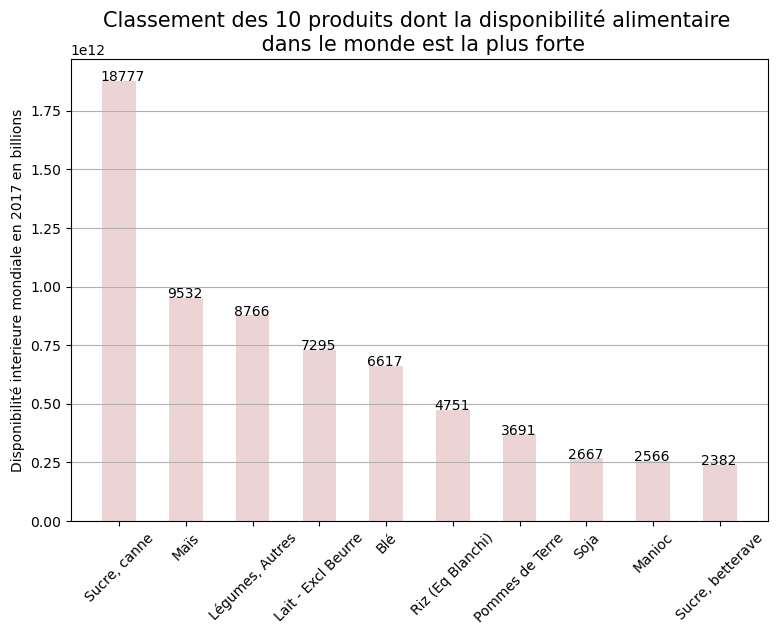

In [224]:
#Calcul de la disponibilité totale de chaque produit
#et top 10 des produits dont la disponibilité est la plus forte.

somme_dispo_produit_totale = join_population_dispo_alimentaire_2017.groupby(
                            'Produit')['Disponibilite interieure'].sum()

somme_dispo_produit_totale_avec_reset = somme_dispo_produit_totale.reset_index()

somme_dispo_produit_totale_avec_reset.head()

somme_dispo_produit_totale_trié_max = somme_dispo_produit_totale_avec_reset.sort_values(
    'Disponibilite interieure',ascending = False).head(10)

somme_dispo_produit_totale_trié_max.head(10)

plt.figure(figsize = (9,6))
plt.bar(height = somme_dispo_produit_totale_trié_max['Disponibilite interieure'], 
        x = somme_dispo_produit_totale_trié_max['Produit'], 
        width = 0.5, 
        color = 'brown', alpha=0.2)
plt.title("Classement des 10 produits dont la disponibilité alimentaire \n dans le monde est la plus forte",
          fontsize = 15)
plt.ylabel("Disponibilité interieure mondiale en 2017 en billions",fontsize = 10)
plt.xlabel("", fontsize = 10)
plt.grid(axis = 'y')
plt.xticks(rotation = 45, ha = "center")

quantite = somme_dispo_produit_totale_trié_max['Disponibilite interieure'].tolist()
for i in range(10):
    plt.text(i-0.28, quantite[i] + 2, round(quantite[i] / 100000000), c ='black')   
plt.show()

In [225]:
#Liste des 10 catégories dont la disponibilité mondiale est la plus faible

somme_dispo_produit_totale_trié_min = somme_dispo_produit_totale_avec_reset.sort_values(
                                    'Disponibilite interieure').head(10)
somme_dispo_produit_totale_trié_min.head(10)

,Produit,Disponibilite interieure
3,Aliments pour enfants,-1.900000e+07
91,Viande de Anim Aquatiq,0.000000e+00
55,Miscellanees,0.000000e+00
45,Huiles de Foie de Poisso,1.700000e+07
26,Girofles,1.300000e+08
74,Poivre,4.070000e+08
46,Huiles de Poissons,8.110000e+08
42,Huile de Son de Riz,1.083000e+09
43,Huile de Sésame,1.109000e+09
5,Animaux Aquatiques Autre,1.366000e+09
